In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/predict-student-performance-from-game-play/sample_submission.csv
/kaggle/input/predict-student-performance-from-game-play/train_labels.csv
/kaggle/input/predict-student-performance-from-game-play/train.csv
/kaggle/input/predict-student-performance-from-game-play/test.csv
/kaggle/input/predict-student-performance-from-game-play/jo_wilder_310/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/predict-student-performance-from-game-play/jo_wilder_310/__init__.py
/kaggle/input/predict-student-performance-from-game-play/jo_wilder/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/predict-student-performance-from-game-play/jo_wilder/__init__.py


In [44]:
use_columns = ['session_id','index' ,'elapsed_time','event_name','name','level_group', 'page','room_coor_x', 'room_coor_y','screen_coor_x'
]


dtype = { 
    
          'session_id': 'category' , 'elapsed_time':np.int32 , 'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'page':'category',
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
     'text':'category',
     'fqid':'category',
     'room_fqid':'category',
     'text_fqid':'category',
     'fullscreen':'category',
     'hq':'category',
     'music':'category',
     'level_group':'category'
}


df = pd.read_csv("/kaggle/input/predict-student-performance-from-game-play/train.csv" , usecols = use_columns , dtype = dtype )


In [37]:
d = pd.read_csv("/kaggle/input/predict-student-performance-from-game-play/train_labels.csv")

d[['session_id','question']] = d['session_id'].str.split('_' , expand = True)
d['question'] = d['question'].str.slice(1)
d['question'] = d['question'].astype(str)

d.head()


,session_id,correct,question
0,20090312431273200,1,1
1,20090312433251036,0,1
2,20090312455206810,1,1
3,20090313091715820,0,1
4,20090313571836404,1,1


In [38]:
pivoted_questions = d.pivot(columns='question', values='correct', index='session_id')
students_score = pivoted_questions.iloc[:, 0:18].sum(axis=1)
students_score = students_score.rename('student_score')
students_score.head()

session_id
20090312431273200    16
20090312433251036    10
20090312455206810    17
20090313091715820    12
20090313571836404    16
Name: student_score, dtype: int64

In [151]:
q = df[["session_id", "elapsed_time", 'level_group', 'event_name' ]].copy()
q.head()


,session_id,elapsed_time,level_group,event_name
0,20090312431273200,0,0-4,cutscene_click
1,20090312431273200,1323,0-4,person_click
2,20090312431273200,831,0-4,person_click
3,20090312431273200,1147,0-4,person_click
4,20090312431273200,1863,0-4,person_click


In [152]:
a = q.groupby(['level_group','session_id'])['elapsed_time'].max()-q_inf.groupby(['level_group','session_id'])['elapsed_time'].min()
a.reset_index()

,level_group,session_id,elapsed_time
0,0-4,20090312431273200,194860
1,0-4,20090312433251036,233752
2,0-4,20090312455206810,363226
3,0-4,20090313091715820,192793
4,0-4,20090313571836404,195851
...,...,...,...
70681,5-12,22100215342220508,967294
70682,5-12,22100215460321130,694581
70683,5-12,22100217104993650,542998
70684,5-12,22100219442786200,324137


In [153]:
a.groupby(['level_group']).mean()

level_group
0-4      1.310529e+06
13-22    3.948647e+06
5-12     2.250162e+06
Name: elapsed_time, dtype: float64

In [154]:
a1 = a.reset_index()[a.reset_index()['level_group'] == '0-4']
a1

# Retrieveing rows having value of level group (0-4)



,level_group,session_id,elapsed_time
0,0-4,20090312431273200,194860
1,0-4,20090312433251036,233752
2,0-4,20090312455206810,363226
3,0-4,20090313091715820,192793
4,0-4,20090313571836404,195851
...,...,...,...
23557,0-4,22100215342220508,554635
23558,0-4,22100215460321130,355799
23559,0-4,22100217104993650,409659
23560,0-4,22100219442786200,191727


In [55]:
a2 = a.reset_index()[a.reset_index()['level_group'] == '5-12']
a2

# Retrieveing rows having value of level group (5-12)

,level_group,session_id,elapsed_time
47124,5-12,20090312431273200,277750
47125,5-12,20090312433251036,550726
47126,5-12,20090312455206810,252444
47127,5-12,20090313091715820,516444
47128,5-12,20090313571836404,306838
...,...,...,...
70681,5-12,22100215342220508,967294
70682,5-12,22100215460321130,694581
70683,5-12,22100217104993650,542998
70684,5-12,22100219442786200,324137


In [155]:

a3 = a.reset_index()[a.reset_index()['level_group'] == '13-22']
a3

# Retrieveing rows having value of level group (13-22)

,level_group,session_id,elapsed_time
23562,13-22,20090312431273200,435947
23563,13-22,20090312433251036,2638851
23564,13-22,20090312455206810,441383
23565,13-22,20090313091715820,645004
23566,13-22,20090313571836404,489132
...,...,...,...
47119,13-22,22100215342220508,55825259
47120,13-22,22100215460321130,719500
47121,13-22,22100217104993650,914347
47122,13-22,22100219442786200,537573


<AxesSubplot: >

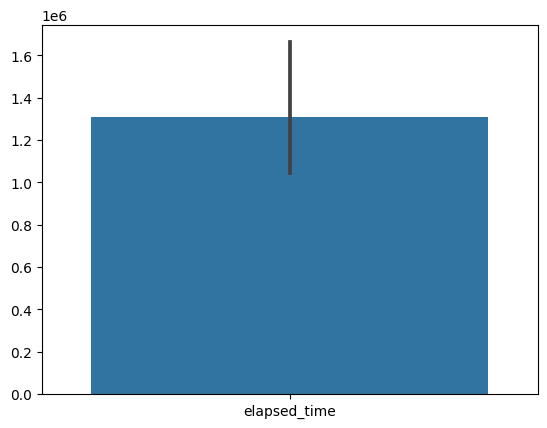

In [156]:
sns.barplot(data = a1)
# random barplot

In [157]:
a1['elapsed_time']=np.log(a1['elapsed_time']+1)
mean_value_1 = a1['elapsed_time'].mean()

print (mean_value_1)

# Retrieveing mean value for rows having value of level group (0-4)

12.611065057315809


In [82]:
a2['elapsed_time']=np.log(a2['elapsed_time']+1)
mean_value_2 = a2['elapsed_time'].mean()

print (mean_value_2)

# Retrieveing mean of rows having value of level group (5-12)

2.6574416021260086


In [83]:
a3['elapsed_time']=np.log(a3['elapsed_time']+1)
mean_value = a3['elapsed_time'].mean()

print (mean_value)

## Retrieveing mean value of rows having value of level group (13-22)

2.690018723176438


<AxesSubplot: xlabel='elapsed_time', ylabel='Count'>

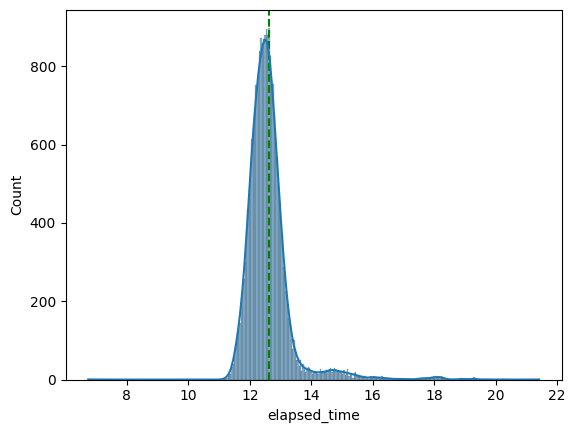

In [161]:
plt.axvline(x = mean_value_1, color = 'g', linestyle = '--',label = "mean")
sns.histplot(data = a1, x = 'elapsed_time',kde = True)

# Plotting the mean value for the levelgroup (0-4) in green

<AxesSubplot: xlabel='elapsed_time', ylabel='Count'>

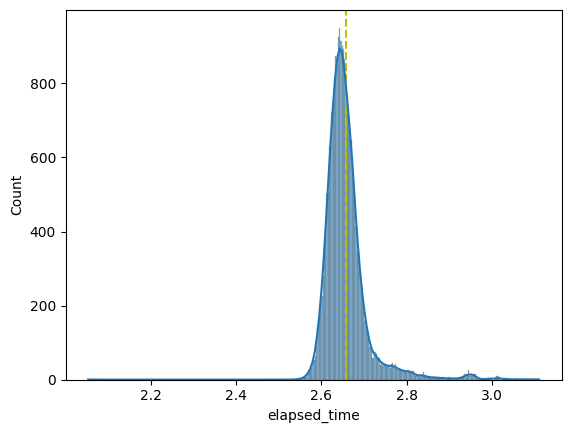

In [162]:
plt.axvline(x = mean_value_2, color = 'y', linestyle = '--')
sns.histplot(data = a2, x = 'elapsed_time',kde = True)

# Plotting the mean value for the levelgroup (5-12) in Yellow

<AxesSubplot: xlabel='elapsed_time', ylabel='Count'>

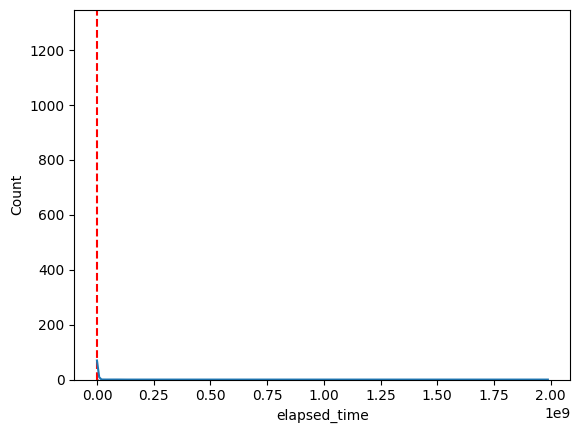

In [164]:
plt.axvline(x = mean_value, color = 'r', linestyle = '--')
sns.histplot(data = a3, x = 'elapsed_time',kde = True)

# # Plotting the mean value for the levelgroup (13-22) in red

In [99]:
d.groupby(['session_id']).sum()
score = d.groupby(['session_id']).sum()

print (score) 

                   correct
session_id                
20090312431273200       16
20090312433251036       10
20090312455206810       17
20090313091715820       12
20090313571836404       16
...                    ...
22100215342220508       16
22100215460321130       12
22100217104993650       15
22100219442786200       13
22100221145014656        7

[23562 rows x 1 columns]


/tmp/ipykernel_32/3450848559.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d.groupby(['session_id']).sum()
/tmp/ipykernel_32/3450848559.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score = d.groupby(['session_id']).sum()


In [100]:
a2_join = pd.merge(a2,score,on = 'session_id')
a2_join

,level_group,session_id,elapsed_time,correct
0,5-12,20090312431273200,2.605242,16
1,5-12,20090312433251036,2.654579,10
2,5-12,20090312455206810,2.598158,17
3,5-12,20090313091715820,2.650049,12
4,5-12,20090313571836404,2.612573,16
...,...,...,...,...
23557,5-12,22100215342220508,2.693428,16
23558,5-12,22100215460321130,2.670769,12
23559,5-12,22100217104993650,2.653585,15
23560,5-12,22100219442786200,2.616588,13


In [101]:
a3_join = pd.merge(a3,score,on = 'session_id')
a3_join

,level_group,session_id,elapsed_time,correct
0,13-22,20090312431273200,2.638006,16
1,13-22,20090312433251036,2.759114,10
2,13-22,20090312455206810,2.638892,17
3,13-22,20090313091715820,2.665631,12
4,13-22,20090313571836404,2.646203,16
...,...,...,...,...
23557,13-22,22100215342220508,2.935862,16
23558,13-22,22100215460321130,2.673205,12
23559,13-22,22100217104993650,2.689613,15
23560,13-22,22100219442786200,2.652878,13


In [102]:
a1_join = pd.merge(a1,score,on = 'session_id')
a1_join

,level_group,session_id,elapsed_time,correct
0,0-4,20090312431273200,1.059473,16
1,0-4,20090312433251036,1.059482,10
2,0-4,20090312455206810,1.059503,17
3,0-4,20090313091715820,1.059473,12
4,0-4,20090313571836404,1.059473,16
...,...,...,...,...
23557,0-4,22100215342220508,1.059522,16
23558,0-4,22100215460321130,1.059502,12
23559,0-4,22100217104993650,1.059508,15
23560,0-4,22100219442786200,1.059472,13


In [124]:
mean_score3 = a3_join.groupby(['correct']).mean()
mean_score3

# mean

/tmp/ipykernel_32/3615348578.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_score3 = a3_join.groupby(['correct']).mean()


,elapsed_time
correct,
1,2.718711
2,2.719999
3,2.734001
4,2.729072
5,2.720970
6,2.712019
7,2.708262
8,2.703603
9,2.698132


In [125]:
mean_score2 = a2_join.groupby(['correct']).mean()
mean_score2

/tmp/ipykernel_32/137085865.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_score2 = a2_join.groupby(['correct']).mean()


,elapsed_time
correct,
1,2.706768
2,2.682179
3,2.698178
4,2.685966
5,2.679462
6,2.675581
7,2.671884
8,2.669086
9,2.666589


In [126]:
mean_score1 = a1_join.groupby(['correct']).mean()
mean_score1

/tmp/ipykernel_32/2427461789.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_score1 = a1_join.groupby(['correct']).mean()


,elapsed_time
correct,
1,1.059534
2,1.059526
3,1.059519
4,1.059505
5,1.059503
6,1.059499
7,1.059498
8,1.059495
9,1.059496


<AxesSubplot: xlabel='elapsed_time', ylabel='correct'>

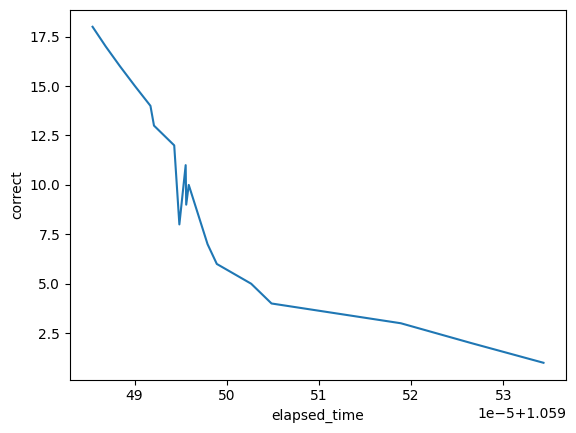

In [127]:
# Plotting lineplot of level group of mean score 1

sns.lineplot(x = mean_score1.elapsed_time , y = mean_score1.index)

<AxesSubplot: xlabel='elapsed_time', ylabel='correct'>

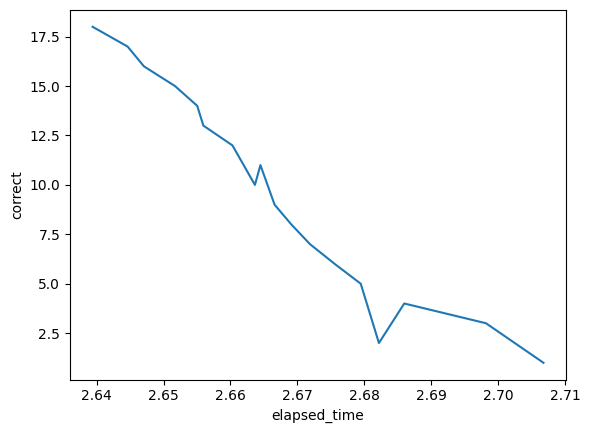

In [128]:
# # Plotting lineplot of level group of mean score 2

sns.lineplot(x = mean_score2.elapsed_time , y = mean_score2.index)

<AxesSubplot: xlabel='elapsed_time', ylabel='correct'>

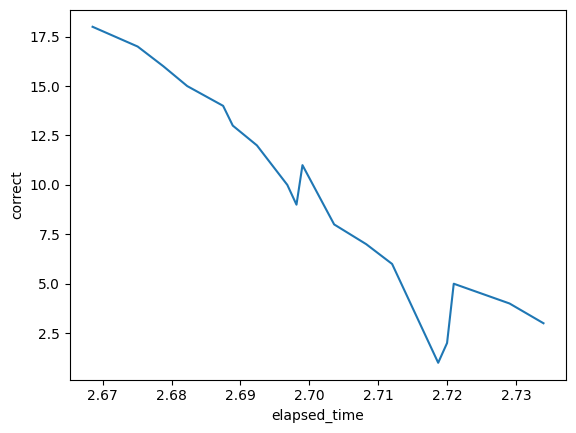

In [129]:
# # Plotting lineplot of level group of mean score 3

sns.lineplot(x = mean_score3.elapsed_time , y = mean_score3.index)

<AxesSubplot: xlabel='elapsed_time', ylabel='correct'>

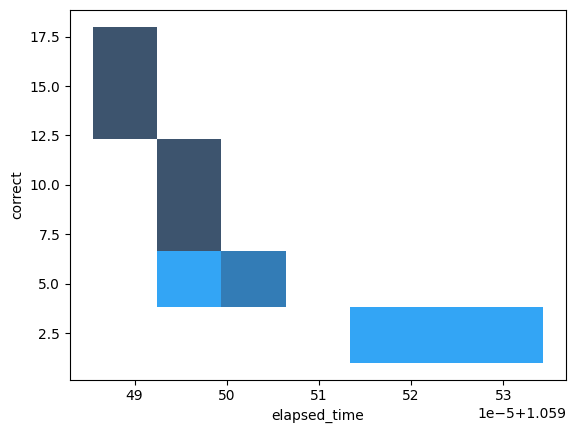

In [130]:
# Plotting histogram for mean score 1

sns.histplot(x = mean_score1.elapsed_time , y = mean_score1.index)

<AxesSubplot: xlabel='elapsed_time', ylabel='correct'>

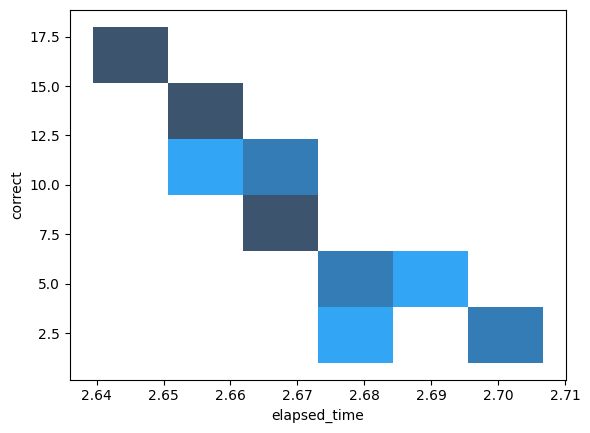

In [165]:
# Plotting histogram for mean score 2

sns.histplot(x = mean_score2.elapsed_time , y = mean_score2.index)

<AxesSubplot: xlabel='elapsed_time', ylabel='correct'>

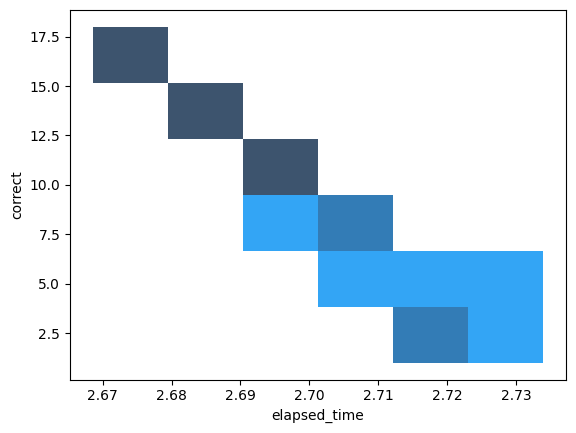

In [167]:
# Plotting histogram for mean score 3

sns.histplot(x = mean_score3.elapsed_time , y = mean_score3.index)

<AxesSubplot: ylabel='correct'>

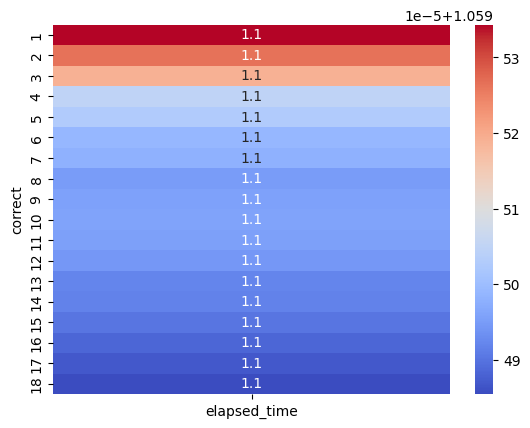

In [168]:
# Plotting heatmap for level_group of 0 - 4

sns.heatmap ( annot = True , data = mean_score1 , cmap = 'coolwarm')

<AxesSubplot: ylabel='correct'>

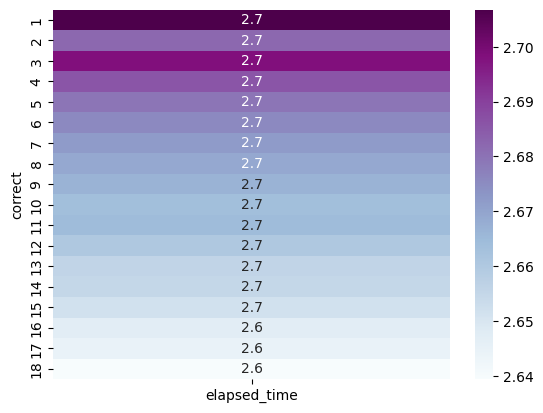

In [169]:
# Plotting heatmap for level_group of 5-12
sns.heatmap ( annot = True , data = mean_score2 , cmap = 'BuPu') 

<AxesSubplot: ylabel='correct'>

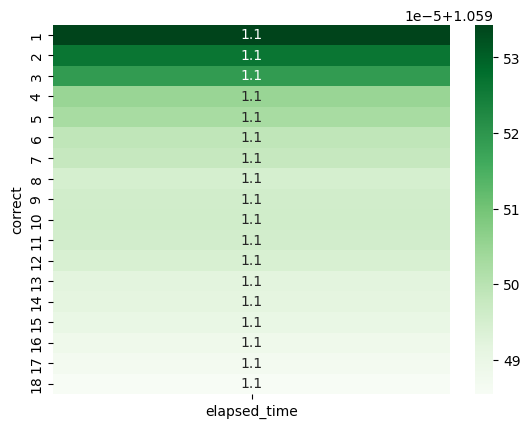

In [170]:
# Plotting heatmap for level_group of 13-22
sns.heatmap ( annot = True , data = mean_score1 , cmap = 'Greens')

In [ ]:
Based on the research, it became clear that our hypothesis was confirmed. Indeed, the less a player spends on a group of levels, the higher his total score Thank you for reading my EDA. If you have any questions, suggestions or ideas, please leave them in the comments, they will be very useful.

Based on the analysis, it became clear that our hypothesis was confirmed. Indeed, the less a player spends time on a group of levels, the higher is his total score 

In [ ]:
from sklearn.linear_model import LinearRegressionModel